In [1]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets

import numpy as np
import matplotlib.pyplot as plt

# Needs 3616 Covid Images and 4000 Normal Images

In [3]:
folder_path = {
    'train': 'C:/Users/Hemanth/Desktop/Pre-trained with GradCAM/train',
    'test': 'C:/Users/Hemanth/Desktop/Pre-trained with GradCAM/test',
    'val': 'C:/Users/Hemanth/Desktop/Pre-trained with GradCAM/val'

}

train_xray = datasets.ImageFolder(root=folder_path['train'], transform=transforms.ToTensor())
test_xray = datasets.ImageFolder(root=folder_path['test'], transform=transforms.ToTensor())
val_xray = datasets.ImageFolder(root=folder_path['val'], transform=transforms.ToTensor())

train_dl = torch.utils.data.DataLoader(train_xray, batch_size=16, shuffle=True, num_workers=2)

In [4]:
train_xray.classes

['covid_19', 'normal']

In [5]:
train_xray.class_to_idx

{'covid_19': 0, 'normal': 1}

In [6]:
print(f'Imgs in Train Set: {len(train_xray)}')
print(f'Imgs in Validation Set: {len(val_xray)}')
print(f'Imgs in Test Set: {len(test_xray)}')

Imgs in Train Set: 6416
Imgs in Validation Set: 600
Imgs in Test Set: 600


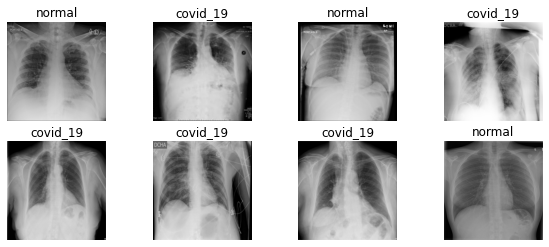

In [9]:
train_img, labels = next(iter(train_dl))
train_img = train_img.numpy()

fig = plt.figure(figsize=(10, 4))
for i in np.arange(8):
    ax = fig.add_subplot(2, 4, i+1)
    ax.axis('off')
    image = np.squeeze(np.transpose(train_img[i], (1, 2, 0)))
    ax.imshow(image)
    ax.set_title(train_xray.classes[labels[i].item()])

plt.show()
plt.close()

In [10]:
count_train = torch.as_tensor(train_xray.targets).bincount()
count_val = torch.as_tensor(val_xray.targets).bincount()
count_test = torch.as_tensor(test_xray.targets).bincount()
count_all = count_train + count_test + count_val